Cantidad de datos después de crear lags: (2817, 5)
Cantidad de datos de entrenamiento: (2817, 5)
Cantidad de datos de prueba: (0, 5)
X_train shape: (2817, 3)
X_test shape: (0, 3)


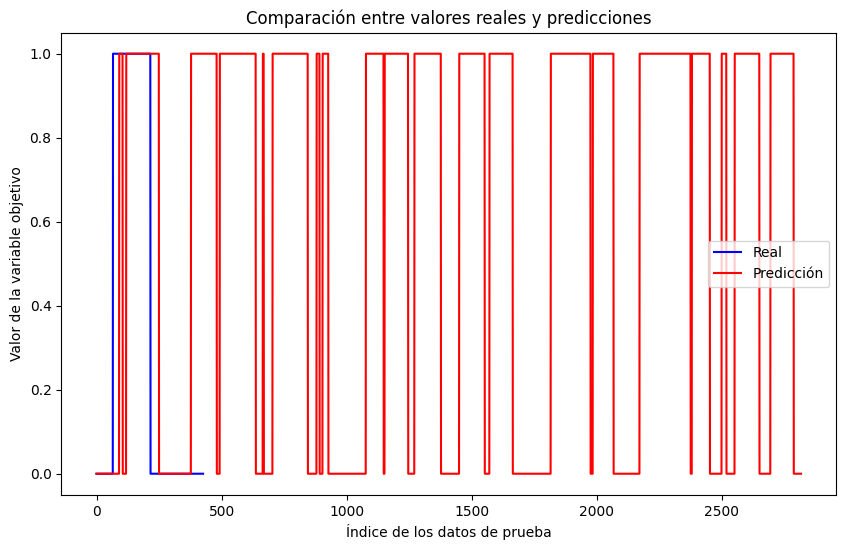

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('../data/processed/cangas_IU.csv', parse_dates=['fecha'])
data = data.sort_values('fecha')

# Crear características de lags
data['afloramiento_lag1'] = data['UI'].shift(1)
data['booleano_lag1'] = data['abierto/cerrado'].shift(1)

# Eliminar filas con valores NaN creados por los lags
data = data.dropna()

# Verificar la cantidad de datos después de crear lags
print(f"Cantidad de datos después de crear lags: {data.shape}")

# Dividir en entrenamiento y prueba basados en la fecha
train_data = data[data['fecha'] < '2018-01-01']
test_data = data[data['fecha'] >= '2018-01-01']

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Cantidad de datos de entrenamiento: {train_data.shape}")
print(f"Cantidad de datos de prueba: {test_data.shape}")

# Características y objetivo
features = ['UI', 'afloramiento_lag1', 'booleano_lag1']
X_train = train_data[features]
y_train = train_data['abierto/cerrado']
X_test = test_data[features]
y_test = test_data['abierto/cerrado']

# Verificar si los conjuntos de características no están vacíos
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
# Entrenar el modelo    
model = RandomForestClassifier(n_estimators=100, random_state=42)    
model.fit(X_train, y_train)  

# Cargar los datos
data2 = pd.read_csv('../data/processed/cangas_IU_2018.csv', parse_dates=['fecha'])
data2 = data.sort_values('fecha')
data2 = data2.drop('fecha', axis=1)

data2 = data2.drop('abierto/cerrado', axis=1)

# Hacer predicciones
y_pred = model.predict(data2)
data3 = pd.read_csv('../data/processed/cangas_IU_2018.csv')
y_test_custom = data3['abierto/cerrado']
# Calcular la precisión
#precision_custom = accuracy_score(y_test_custom, y_pred)
#print(f"Precisión de las predicciones en el conjunto de prueba: {precision_custom * 100:.2f}%")
plt.figure(figsize=(10, 6))
# Graficar valores reales
plt.plot(y_test_custom.values, label='Real', color='blue', linestyle='-')
# Graficar predicciones
plt.plot(y_pred, label='Predicción', color='red', linestyle='-')
# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()
# Mostrar el gráfico
plt.show()
